In [1]:
# read top reasons
import pickle
with open('top_reasons.dat') as f:
    reason_top = pickle.load(f)
f.close()

In [ ]:
# reading model trained on sensor only

file = 'auc_reason_sensor.dat'

import numpy as np

with open(file) as f:
    aucs, _, labels = pickle.load(f)
f.close()
    
auc_top10 = list(np.array([]) for ii in range(len(reason_top)))
for (k,lab) in enumerate(labels):
    for (j,reason) in enumerate(reason_top):
        if reason in lab:
            ind = np.where(lab==reason)[0]
            auc_top10[j] = np.append(auc_top10[j], aucs[k][ind])

auc_mean_sensor = np.array([])
auc_ci_sensor = np.array([])
for (j, a) in enumerate(auc_top10):
    auc_mean_sensor = np.append(auc_mean_sensor, np.nanmean(a))
    auc_ci_sensor = np.append(auc_ci_sensor, 2*np.nanstd(a)/np.sqrt(208))


In [2]:
# reading model trained on sensor + foursquare

file = 'auc_reason_sensor_fsq.dat'

import numpy as np

with open(file) as f:
    aucs, _, labels = pickle.load(f)
f.close()
    
auc_top10 = list(np.array([]) for ii in range(len(reason_top)))
for (k,lab) in enumerate(labels):
    for (j,reason) in enumerate(reason_top):
        if reason in lab:
            ind = np.where(lab==reason)[0]
            auc_top10[j] = np.append(auc_top10[j], aucs[k][ind])

auc_mean_sensor_fsq = np.array([])
auc_ci_sensor_fsq = np.array([])
for (j, a) in enumerate(auc_top10):
    auc_mean_sensor_fsq = np.append(auc_mean_sensor_fsq, np.nanmean(a))
    auc_ci_sensor_fsq = np.append(auc_ci_sensor_fsq, 2*np.nanstd(a)/np.sqrt(208))


/usr/local/lib/python2.7/dist-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/numpy/lib/nanfunctions.py:1147: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)


In [3]:
# reading model trained on sensor, foursquare, and location predicted by lower-level classifier

file = 'auc_reason_sensor_fsq_predlocation.dat'

import numpy as np

with open(file) as f:
    aucs, _, labels = pickle.load(f)
f.close()
    
auc_top10 = list(np.array([]) for ii in range(len(reason_top)))
for (k,lab) in enumerate(labels):
    for (j,reason) in enumerate(reason_top):
        if reason in lab:
            ind = np.where(lab==reason)[0]
            auc_top10[j] = np.append(auc_top10[j], aucs[k][ind])

auc_mean_sensor_fsq_predlocation = np.array([])
auc_ci_sensor_fsq_predlocation = np.array([])
for (j, a) in enumerate(auc_top10):
    auc_mean_sensor_fsq_predlocation = np.append(auc_mean_sensor_fsq_predlocation, np.nanmean(a))
    auc_ci_sensor_fsq_predlocation = np.append(auc_ci_sensor_fsq_predlocation, 2*np.nanstd(a)/np.sqrt(208))
print auc_mean_sensor_fsq_predlocation

[ 0.8908242   0.75708793  0.67467797  0.66755044  0.7602652   0.81262728
  0.62894179  0.5628552   0.49854227         nan]


([<matplotlib.axis.XTick at 0x7f0bf15dd910>,
 <a list of 10 Text xticklabel objects>)

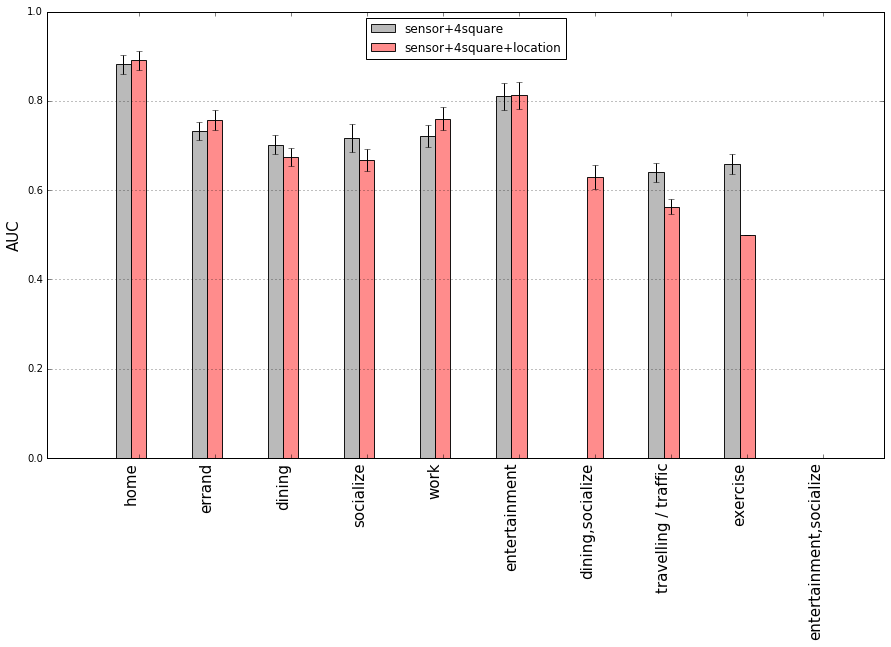

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))
w = 1/5.0
plt.bar(np.arange(0,10,1), auc_mean_sensor_fsq, w, yerr=auc_ci_sensor_fsq, align='center',\
         color=(.7,.7,.7), alpha=0.9, ecolor=(0,0,0))
plt.bar(np.arange(w,10+w,1), auc_mean_sensor_fsq_predlocation, w, yerr=auc_ci_sensor_fsq_predlocation, align='center', \
         color=(1,.5,.5), alpha=0.9, ecolor=(0,0,0))
# plt.bar(np.arange(2*w,10+2*w,1), auc_mean_sensor_fsq_predlocation, w, yerr=auc_ci_sensor_fsq_predlocation, align='center', \
#          color=(.3,.7,.3), alpha=0.9, ecolor=(0,0,0))
plt.legend(['sensor+4square','sensor+4square+location'], loc='upper center')
plt.ylabel('AUC',fontsize=15,color=(0,0,0))
axes = plt.gca()
axes.set_xlim([-1, len(reason_top)])
axes.set_ylim([0, 1])
axes.yaxis.grid();
plt.xticks(np.arange(.2,10.2,1), reason_top, fontsize=15, color=(0,0,0), rotation=90, ha='right');
# plt.yticks(np.arange(.4,1,.05), np.arange(.4,1,.05), fontsize=12, color=(0,0,0));
# print auc_mean_sensor
# print np.nanmean(auc_mean_fsq)
# print np.mean(auc_mean_all)


In [ ]:
conf = np.zeros([10,10])
for (i,c_row) in enumerate(conf_top10):
    for (j,c) in enumerate(c_row):
        conf[i,j] = np.sum(conf_top10[i][j])
cm_normalized = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, state_top10, title='confusion matrix - sensor+fousquare')

In [ ]:
conf = np.zeros([10,10])
for (i,c_row) in enumerate(conf_top10_fsq):
    for (j,c) in enumerate(c_row):
        conf[i,j] = np.sum(conf_top10_fsq[i][j])
cm_normalized = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, state_top10, title='confurion matrix: foursquare')
print cm_normalized[3,:]

In [ ]:
np.random.random(10)